<a href="https://colab.research.google.com/github/onleey/Machine-Learning_demo/blob/master/606_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%ED%9A%8C%EA%B7%80_python%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/001'

Mounted at /content/drive
/content/drive/MyDrive/001


### 회귀(Regression)
 - 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
 - 독립변수와 종속변수 간의 상관관계를 모델링하는 기법이다.
 - 1개의 독립변수 : 단일회귀(선형 단위회귀), 여러개의 독립변수 : 다중회귀 (비선형 회귀)

### 회귀의 어원###
 유전학자 프란시스 골턴은 유전의 법칙에 연구하다 회귀의 법칙을 발견하였다. 그는 아들의 키를 아버지의 키와 비교할 경우, 아버지의 키가 아무리 크다고 할지라도 아들의 키는 모집단(아들세대)의 평균으로 접근하려는 경향을 발견했다. 즉, 키가 큰 아버지는 자신보다 키가 좀 더 작은 아들을 가지며, 키가 작은 아버지는 자신보다 키가 좀 거 큰 아들을 갖는 경향을 발견했다. 골턴은 이러한 현상을 평균으로 회귀(regression toward mean)라고 했다.
이처럼 회귀분석의 회귀란 평균으로 되돌아 간다는 의미이다.

1. 데이터 정의

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

(5, 1)
(5, 1)


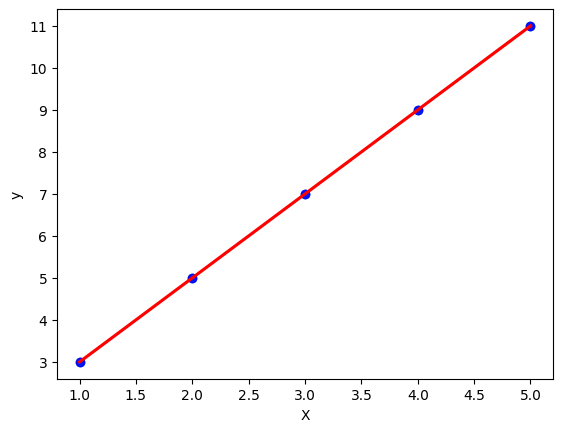

In [18]:
X = np.array ([1,2,3,4,5]) .reshape(-1,1)
y = np.array ([3,5,7,9,11]). reshape(-1,1)

print(X.shape)
print(y.shape)

plt.scatter(X,y)

pd_X = pd.DataFrame(X, columns=['X'])
pd_y = pd.DataFrame (y,columns=['y'])
pd_df = pd.concat([pd_X, pd_y ], axis = 1)

sns.regplot(data = pd_df, x='X', y='y',line_kws= {'color':'red'}, scatter_kws={'color':'blue'})

plt.show()

- 가설함수(Hypothesis)  
  H(x)=  Wx + b


- 오차함수  loss(W,B) 의 정의  
$loss(W,B) = L(g(W,B)) = MSE = \frac{1}{n}\sum_{i=1}^{n} (Y_i-\hat{Y_i})^2$

- 오차 함수의 W, b에 대한 도함수 (편미분)
  - 제곱오차(SE)   
$f = (y - \hat{y})^2$
  - 가중치:weight(기계학습) = 회귀계수:coefficient(통계)       
$\frac{df}{dW} =  \frac{d}{dW}  \frac{1}{2}(y - \hat{y})^2 =   -X * (y - \hat{y})$    
  - 편향:bias(기계학습) = 절편:intercept(통계)       
$\frac{df}{db} = \frac{d}{db}  \frac{1}{2}(y - \hat{y})^2 =   - (y - \hat{y})$

- 경사하강법(gradient descent) 적용  
  - 가중치 업데이트  
$W = W - \alpha(\frac{df}{dW})$
  - 절편 업데이트   
$b = b - \alpha(\frac{df}{db})$)


단순 선형회귀

In [65]:
# 학습율

learning_rate = 0.01

X = np.array ([1,2,3,4,5]).reshape (-1,1)
y = np.array ([3,5,7,9,11]).reshape (-1,1)

print(X.shape)
print(y.shape)

W= np.zeros((1,1))
b = np.zeros ((1,1))
print(W.shape)
print(b.shape)

def liner_forward(X,y,W,b):
  y_pred = np.dot(X,W.T) + b   #(5,1)(1)
  cost = np.sum(np.square(y - y_pred))/len(y)
  return y_pred, cost


y_pred, cost = liner_forward (X,y,W,b)
print('======학습전(before)======')
print('W:{}, b:{},cost:{}'.format(W, b, cost))


def loss_gradient(X,y,W,b):

    #가설함수 (hypersis function) : y예측값을 구하는 식
    #y_pred = WX+b

    y_pred = np.dot(X,W) + b
    #print(y_pred)
    #print('W.shape:{} b.shape:{}'.format(W.shape, b.shape))

    # W : -x(y = y_pred), b:-1(y-y_pred)

    # 오차 (Error)
    #error = y -y_pred


    b_factors = np.ones((len(y),1))
    #편미분
    de_W = -1 * np.dot(X.T, y - y_pred)

    #de_b = -1 * np.dot (b_factors.T, y - y_pred)
    de_b = np.sum(y - y_pred, axis = 0)

    de_W = (1/len(y)) * de_W
    de_b = (1/len(y)) * de_b

    return de_W, de_b

for i in range(1000):
    de_W, de_b = loss_gradient (X,y,W,b)

    #경사하강법 적용

    W = W - learning_rate * de_W
    b = b - learning_rate * de_b

y_pred, cost = liner_forward (X,y,W,b)
print('=====학습 후 =====')
print('W:{}, b:{},cost:{}'.format(W, b, cost))








(5, 1)
(5, 1)
(1, 1)
(1, 1)
======학습전(before)======
W:[[0.]], b:[[0.]],cost:57.0
=====학습 후 =====
W:[[5.14641938]], b:[[-10.742597]],cost:25.10527972130425


[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]
[322.7997482345469, 300.3486318369093, 278.7775154392719, 258.08639904163437, 238.2752826439969, 219.34416624635946, 201.29304984872198, 184.12193345108446, 167.83081705344702, 152.41970065580952, 137.88858425817205, 124.23746786053457, 111.4663514628971, 99.5752350652596, 88.56411866762214, 78.43300226998467, 69.18188587234718, 60.81076947470971, 53.319653077072246, 46.708536679434765, 40.977420281797286, 36.12630388415981, 32.15518748652234, 29.064071088884862, 26.85295469124739]


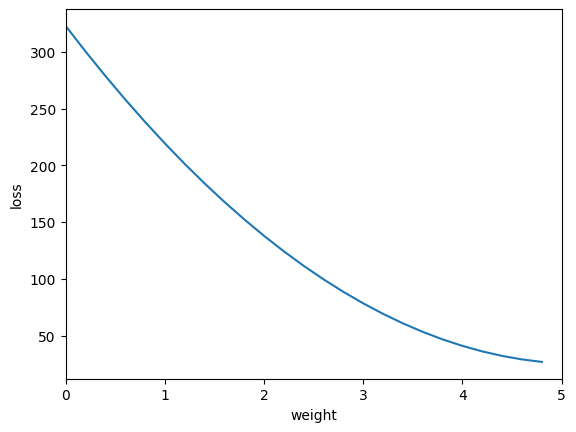

In [66]:
weights = np.arange(0,5, 0.2)
print(weights)

loss_array=[]
for weight in weights:
  _, loss = liner_forward(X, y, weight, b)
  loss_array.append(loss)

print(loss_array)

fig = plt.figure()
ax = plt.axes(xlim =(0,5))
ax.plot(weights, loss_array)
ax.set_xlabel('weight')
ax.set_ylabel('loss')
plt.show()

In [67]:
def predict(test):
  return W*test+b

predict(7)

array([[25.28233868]])

X.shape: (5, 2)
y.shape: (5, 1)
W.shape:  (2, 1)
b.shape:  (1, 1)


<ipython-input-68-6c85c535b0cb>:103: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  redDot.set_data(frame, loss)


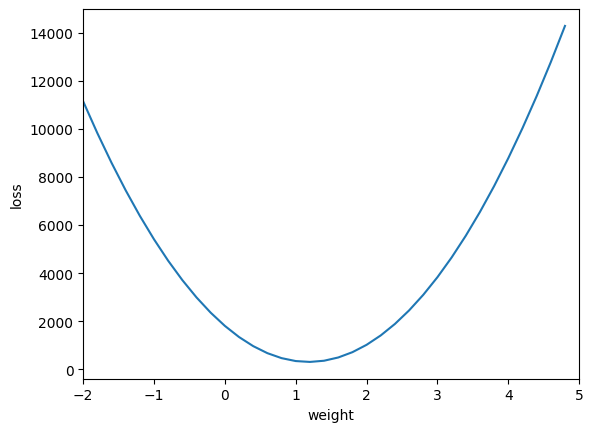

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


# 학습율
learning_rate = 0.01


X = np.array([[2,4,6,8,10],[0,4,2,3,4]]).T
y = np.array([81,93,91,97,98]).reshape(-1,1)


print('X.shape:', X.shape)  # 5행 2열
print('y.shape:', y.shape)  # 5행 1열


W = np.zeros((2,1)) # 기울기 0으로 초기화
b = np.zeros((1,1)) # 절편 0으로 초기화
print('W.shape: ', W.shape)
print('b.shape: ', b.shape)




def linear_forward(X, y, W, b) :
   y_pred = sum(np.dot(X, W)) + b
   cost = np.sum(np.square(y - y_pred))/len(y)
   return y_pred, cost




def loss_gradient(X, y, W, b, l1=0.2, l2=0.7):
   # 가설함수(hypersis function)  : y예측값을 구하는 식
   y_pred = np.dot(X, W) + b
   #print('W.shape: ', W.shape, '    b.shape: ', b.shape)

   # 오차(Error)
   #error = y - y_pred


   # 편미분
   #de_W = (1/len(y)) *sum((y - y_pred) * X)
   #de_b = (1/len(y)) *sum(y - y_pred)


   de_W = np.dot(X.T, y - y_pred)     # -X * ( y - y_pred)
   de_b = np.sum (y - y_pred, axis=0) # -(y - y_pred)


   # l1, l2 (랏소, 릿지) 규제적용
   de_W = (1/len(y)) * de_W + l1*np.sign(W) + l2*W
   de_b = (1/len(y)) * de_b




   return de_W, de_b



train_W = []
for i in range(1000) :
   de_dW, de_db = loss_gradient(X, y, W, b)


   #경사하강법 적용
   W = W - (-1) * learning_rate * de_dW
   b = b - (-1) * learning_rate * de_db


   train_W.append(W)




# loss_weight그래프
weights = np.arange(-2, 5, 0.2)


loss_array = []
for weight in weights :
    _, loss = linear_forward (X, y, weight, b)
    loss_array.append(loss)


fig = plt.figure()
ax = plt.axes(xlim=(-2, 5))
ax.plot(weights, loss_array)
ax.set_xlabel('weight')
ax.set_ylabel('loss')
#plt.show()


# 애니메이션 설정
redDot,  = plt.plot([],[], 'ro')


def animate(frame):
  _, loss = linear_forward(X, y, frame, b)
  redDot.set_data(frame, loss)
  return redDot




ani = FuncAnimation(fig, animate, frames=np.array(train_W))
FFWriter = animation.FFMpegWriter(fps=1)
ani.save('animation.mp4', writer = FFWriter)


#print(loss_array)
